# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Tensorflow Version used

In [2]:
tf.__version__

'2.8.0'

# Loading Dataset

In [3]:
df = pd.read_csv("train.csv")

Top 5 rows of Dataset

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(20800, 5)

In [6]:
df["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


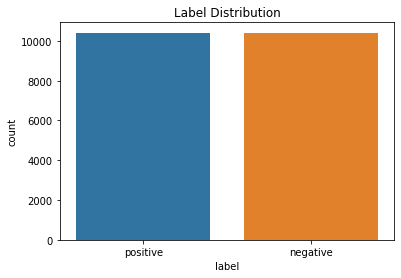

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot("label", data = df)
plt.title("Label Distribution")
plt.xticks([0,1],["positive", "negative"])
plt.show()

Dataset shape

In [8]:
df.shape

(20800, 5)

Count of Null values in Dataset

In [9]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Droping Null values

In [10]:
df = df.dropna()

C:\Users\yadav\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


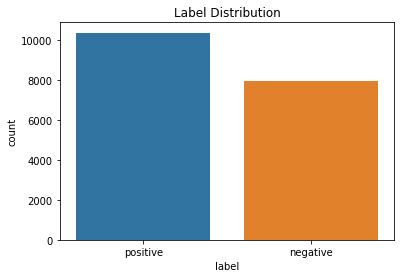

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot("label", data = df)
plt.title("Label Distribution")
plt.xticks([0,1],["positive", "negative"])
plt.show()

In [12]:
df["label"].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [13]:
df.shape

(18285, 5)

Get Independent Feature

In [14]:
x = df.drop('label', axis = 1)

In [15]:
x.shape

(18285, 4)

Get Dependent Features

In [16]:
y = df['label']

In [17]:
y.shape

(18285,)

Define Vocabulary Size

In [18]:
voc_size = 5000

# WordCloud

In [19]:
from wordcloud import WordCloud, STOPWORDS 
def word_cloud(title_, text):
    """ Create WorldCloud """
    stopword_list = set(STOPWORDS) 

    wordcloud = WordCloud(width = 400, height = 200, 
                    background_color ='white', 
                    stopwords = stopword_list, 
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title_, fontsize=20)
    plt.show() 

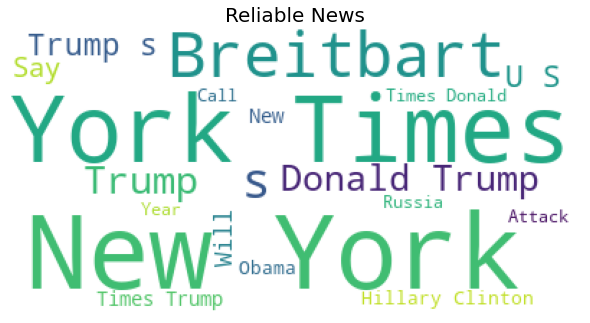

In [20]:
word_cloud("Reliable News", " ".join(df[df["label"] == 0].title.tolist()))

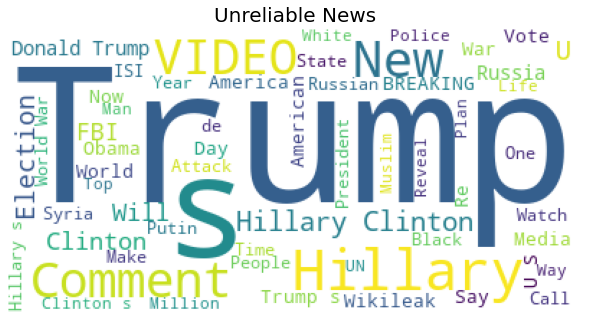

In [21]:
word_cloud("Unreliable News", " ".join(df[df["label"] == 1].title.tolist()))

# Data Preprocessing

In [22]:
messages = df.copy()   

In [23]:
messages.reset_index(inplace = True)

Removing Stopping Words and Lemmatizing

In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
lem = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()
  review = [lem.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [27]:
corpus[0]

'house dem aide even see comey letter jason chaffetz tweeted'

OneHot Representation of Dataset

In [28]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr[0]

[419, 3238, 1433, 1934, 3642, 4858, 2346, 1262, 700, 1972]

Embedding Representation

In [29]:
sent_length = 20
embedded_docs = pad_sequences(onehot_repr, padding= "pre", maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 1262  700 1972]
 [   0    0    0 ... 2784  526 4578]
 [   0    0    0 ... 3720  489 4256]
 ...
 [   0    0    0 ... 4710 2399  478]
 [   0    0    0 ... 2201 1315 4141]
 [   0    0    0 ...  199 3571 1864]]


In [30]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  419,
       3238, 1433, 1934, 3642, 4858, 2346, 1262,  700, 1972])

In [31]:
len(embedded_docs)

18285

# Create Model

In [32]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
len(embedded_docs), y.shape

(18285, (18285,))

In [34]:
x_final = np.array(embedded_docs)
y_final = np.array(y)

In [35]:
x_final.shape, y_final.shape

((18285, 20), (18285,))

Train Test Split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.33, random_state = 42)

# Model Training

In [37]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64)

Epoch 1/10
192/192 [==============================] - 10s 32ms/step - loss: 0.3492 - accuracy: 0.8313 - val_loss: 0.2032 - val_accuracy: 0.9152
Epoch 2/10
192/192 [==============================] - 6s 29ms/step - loss: 0.1426 - accuracy: 0.9434 - val_loss: 0.2164 - val_accuracy: 0.9190
Epoch 3/10
192/192 [==============================] - 6s 30ms/step - loss: 0.0948 - accuracy: 0.9669 - val_loss: 0.2484 - val_accuracy: 0.9175
Epoch 4/10
192/192 [==============================] - 6s 30ms/step - loss: 0.0569 - accuracy: 0.9805 - val_loss: 0.2561 - val_accuracy: 0.8993
Epoch 5/10
192/192 [==============================] - 5s 28ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.3719 - val_accuracy: 0.9137
Epoch 6/10
192/192 [==============================] - 5s 28ms/step - loss: 0.0247 - accuracy: 0.9926 - val_loss: 0.3631 - val_accuracy: 0.9123
Epoch 7/10
192/192 [==============================] - 5s 28ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.4479 - val_accuracy: 0.908

# Performance Metrics and Accuracy

In [38]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

In [39]:
confusion_matrix(y_test, y_pred)

array([[3078,  341],
       [ 194, 2422]], dtype=int64)

In [40]:
accuracy_score(y_test, y_pred)

0.9113504556752279

# Create Model with Dropout Layer

In [41]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))
model.add(Dropout(.3))
model.add(LSTM(100))
model.add(Dropout(.3))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [42]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64)

Epoch 1/10
192/192 [==============================] - 9s 37ms/step - loss: 0.3512 - accuracy: 0.8442 - val_loss: 0.2102 - val_accuracy: 0.9147
Epoch 2/10
192/192 [==============================] - 6s 30ms/step - loss: 0.1560 - accuracy: 0.9395 - val_loss: 0.1962 - val_accuracy: 0.9158
Epoch 3/10
192/192 [==============================] - 6s 30ms/step - loss: 0.1133 - accuracy: 0.9575 - val_loss: 0.2097 - val_accuracy: 0.9143
Epoch 4/10
192/192 [==============================] - 6s 29ms/step - loss: 0.0834 - accuracy: 0.9694 - val_loss: 0.2385 - val_accuracy: 0.9072
Epoch 5/10
192/192 [==============================] - 5s 28ms/step - loss: 0.0604 - accuracy: 0.9798 - val_loss: 0.2663 - val_accuracy: 0.9056
Epoch 6/10
192/192 [==============================] - 5s 28ms/step - loss: 0.0472 - accuracy: 0.9847 - val_loss: 0.3287 - val_accuracy: 0.9135
Epoch 7/10
192/192 [==============================] - 6s 30ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.3668 - val_accuracy: 0.9011

In [43]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Performance Metrix and Accuracy

In [44]:
confusion_matrix(y_test, y_pred)

array([[3065,  354],
       [ 192, 2424]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.9095277547638774